# Iterated Prisoner's Dilemma

## The problem
The Prisoner's dilemma is an example of a game that shows why two rational individuals might not cooperate, even if it appears in their best interest to do so.  
The example cites as follows:  
"Two members of a criminal gang are arrested and imprisoned. Each prisoner is in solitary confinement with no means of speaking to or exchanging messages with the other. The police admit they don't have enough evidence to convict the pair on the principal charge. They plan to sentence both to a year in prison on a lesser charge. Simultaneously, the police offer each prisoner a Faustian bargain." ([cit](https://www.worldcat.org/title/prisoners-dilemma/oclc/23383657))

Each player A and B has two actions: cooperate (C) with the other prisoner or defect (D), giving them up to the autorities. Both players decide on their action without knowing the action of the other player.

In the following matrix, the values $(A_{i,j},B_{i,j})$ refer to the payoff A and B, respectively, would get in the case A chose action $i$ and B chose action $j$, where $i,j \in \{ \text{cooperate}, \text{defect}\}$. 

$$
\begin{aligned}
& \text {Payoff matrix }\\
&\begin{array}{cccc}
\hline \hline  &  & \qquad \text{Prisoner B} \\
 &  & \text{Cooperate}  & \text{Defect} \\
\text{Prisoner A} & \text{Cooperate} & (R,R) & (S,T) \\
 & \text{Defect} & (T,S) & (P,P) \\
\hline
\end{array}
\end{aligned}
$$
This table defines a Prisoner’s Dilemma game if $T > R > P > S$ and $2R > S + T$. This way, the dilemma unfolds: For each player it is individually beneficial to defect, irrespective of the choice of his opponent. The highest mutual payoff, however, is generated when both players cooperate.

It is assumed that both prisoners understand the nature of the game, have no loyalty to each other, and will have no opportunity for retribution or reward outside the game. 

### Iterated version
If two players play the game more than once in succession and they remember previous actions of their opponent and change their strategy accordingly, the game is called Iterated Prisoner's Dilemma (IPD).  
After each game, each player observes both the previous action of their opponent and their own previous action.

## Formalisation
The prisoner's dilemma is a 2-player Matrix game, has only four states and two choices of actions. Since the reward (payoff) for a given action depends also on the actions of the other player, it is an adversarial bandits problem.  
The four states consist of all possible combinations of actions for (A's previous action, B's previous action): $(C,C), (C,D), (D,C), (D,D)$.

At each time $t$, the player simultaneously choose their actions. The rewards depend on both actions, and they can be written as the payoff matrix reported above.  

Considering the set of possible actions, if for any pair no individual player can benefit by changing its individual strategy, then that's a Nash equilibrium.
There has been [research](https://www.pnas.org/doi/10.1073/pnas.1206569109) showing that only one single previous state is needed, in order to define any prisoner’s dilemma strategy.

### Q-Learning 
One agent learns the value function via Q-learning, a reinforcement learning technique developed in $1989$ that iteratively updates expected cumulative discounted reward $Q$ given a state $s$, and a future action $a$ (from [Sutton and Barto](http://incompleteideas.net/book/the-book-2nd.html)):  
<img src="Qlearning.png" width="500">

The action gets chosen using a decaying $\varepsilon$-greedy policy, that is, 
$$A_t = \begin{cases} \max_a Q(A_t) \quad \text{with probability } 1- \varepsilon \\ \text{random action} \quad \text{with probability }\varepsilon \end{cases}$$

As the update rule does not depend on the current exploration but on the assumed optimal choice, Q-Learning does not require the current policy to converge towards the optimal policy, therefore doesn't strictly need the decaying $\varepsilon$, as for example SARSA would. Q-learning is able to generate an optimal policy even using only uniformly random actions, given sufficient iterations. Nevertheless, 

The parameters used will be:
* The values $R = 3$, $S = 0$, $T =5$, $P=1$ for the payoff matrix
* a discount factor $\gamma = 0.95$
* a learning rate $\alpha = 0.1$
* a starting epsilon $\varepsilon = 0.3$, with a decay of $0.999$ per step, reaching a minimum of $\varepsilon = 0.1$

The payoff matrix is
$$
\begin{aligned}
& \text {Payoff matrix }\\
&\begin{array}{cccc}
\hline \hline  &  & \qquad \text{Prisoner B} \\
 &  & \text{Cooperate}  & \text{Defect} \\
\text{Prisoner A} & \text{Cooperate} & (3,3) & (0,5) \\
 & \text{Defect} & (5,0) & (1,1) \\
\hline
\end{array}
\end{aligned}
$$

### SARSA
The agent can also learn the value function via SARSA. The Sarsa algorithm is an on-policy algorithm that uses TD learning method to estimate the Q table. The Sarsa update method is given by:

<img src="Sarsa.png" width="500">

Differently from Q-learning, Sarsa considers which action is actually taken when updating the action-value function Q.

### Opponent's strategies
Over time various strategies in the IPD game emerged. The ones that will be considered here are:
* *Always cooperate*: always cooperate, indepentently of period or observed actions. If played against itself, it always recieves an average reward of 3 in this setting.
* *Always defect*:  This strategy is by definition unexploitable and will always have at least the same average reward as the opposing strategy.
* *Random action*: As the name implies, this strategy plays a random action independent of period and observations. The probability to play a cooperation is here st to $0.5$.
* *Tit-for-tat*: This strategy starts with a cooperation and copies the move of the opponent in the following periods.

## Implementation

First, import all needed classes and functions.

In [1]:
from utils import Game, Meeting
from strategy import Cooperate, Defect, Random, TitforTat, QLearning, Sarsa

Let's define the payoff matrix, and the possible actions. We can instantiate a first game with them, and get the Nash equilibrium.

In [2]:
# define payoff matrix
payoff =[[(3,3),(0,5)],[(5,0),(1,1)]]

# initiate game with two possible actions: cooperate or defect
# numeric action codes: [0,1]
actions = [0,1] 
g = Game(payoff, actions)

# returns a list of Nash equilibrium indexes
g.getNash() 

[(1, 1)]

As expected, the Nash equilibrium is to defect.

Let's see how the strategies play out. Remember that 0 = Cooperate, 1 = Defect.

In [3]:
# test action classes
for strategy in [Cooperate(), Defect(), Random()]: 
    s1 = strategy
    print(s1.name,end=" ")
    for i in range (0,20):
        print(s1.get_action(i), end=' ')
    print('\n')

cooperate 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

defect 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

random 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 



To test Tit-for-Tat, we need an opponent, so we create a meeting. The player starts by cooperating, to then copy the opponent's previous action.  
```pretty_print()``` reports the first (max 50) actions for each player and their scores. The score is the sum of the scores obtained on each game, according to the payoff matrix. The higher the better.

In [4]:
m = Meeting(g, TitforTat(), Random(), 20)
m.run()
m.pretty_print()

TitforTat	0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 = 50
random	1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 = 50


We can also display the counter for how many times each player decided to cooperate.

In [5]:
s1 = TitforTat()
s2 = Defect()
m = Meeting(g, s1, s2, 100)
m.run()
m.pretty_print()

print()
print("Number of cooperations : " )
print (m.s1.name + "\t" + str(m.num_cooperation_s1))
print (m.s2.name + "\t" + str(m.num_cooperation_s2))

TitforTat	0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ... = 99
defect	1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ... = 104

Number of cooperations : 
TitforTat	1
defect	0


### Q-learning
We can play our Q-learning agent against any other strategy. We can also visualise the final Q-table.

In [6]:
s1 = QLearning()
s2 = Random()
m = Meeting(g, s1, s2, 10000)
m.run()
m.pretty_print(max = 50)
print()
print("Number of cooperations : " )
print (m.s1.name + "\t" + str(m.num_cooperation_s1))
print (m.s2.name + "\t" + str(m.num_cooperation_s2))

QLearning	0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 ... = 22416
random	1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 ... = 22816

Number of cooperations : 
QLearning	5104
random	5024


In [7]:
# how to read it:
# first as states:
# [[I cooperate],         in each block:  
#                         [they cooperate],                   in each row, for action:
#  [I defect   ]]         [they defect   ]                    [next is cooperate, next is defect]

m.s1.print_qtable()

array([[[36.64273126,  0.        ],
        [40.74439689,  0.        ]],

       [[ 0.        , 49.52114677],
        [ 0.        , 49.92174679]]])

If we put it against SARSA, the results are very similar, and depend heavily on the random seed.

In [10]:
s2 = Sarsa(alpha = 0.3)
s1 = QLearning(alpha = 0.3)
m = Meeting(g, s1, s2, 50000)
m.run()
m.pretty_print(max = 50)
print()
print("Number of cooperations : " )
print (m.s1.name + "\t" + str(m.num_cooperation_s1))
print (m.s2.name + "\t" + str(m.num_cooperation_s2))

QLearning	0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 ... = 115538
Sarsa	1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 ... = 109813

Number of cooperations : 
QLearning	24538
Sarsa	25683


Both algorithms tend to get $50\%$ cooperations, as the number of iterations increase:

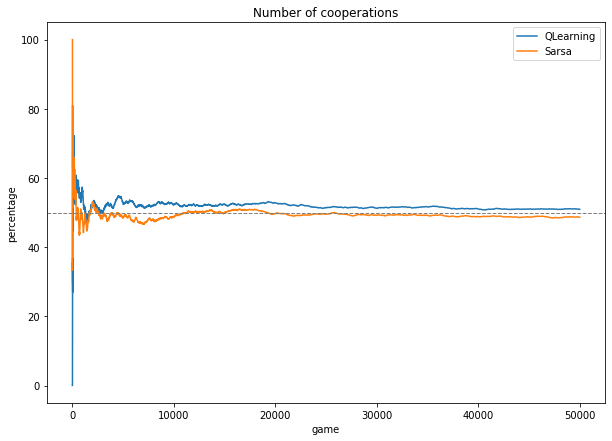

In [11]:
m.plot_cooperations()